In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('/content/Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
df.shape

(10000, 6)

In [5]:
df.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
df.duplicated().sum()

127

In [7]:
df.drop_duplicates(inplace=True)

In [8]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873.000000,9873.000000,9873.000000
mean,4.992100,69.441102,6.531652,4.583004,55.216651
std,2.589081,17.325601,1.697683,2.867202,19.208570
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,70.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


# **EDA**

In [10]:
fig1 = px.pie(df, names='Extracurricular Activities', title='Extracurricular Activities Distribution')
fig1.show()

In [11]:
fig2 = px.histogram(df, x='Sleep Hours', nbins=5, title='Distribution of Sleep Hours')
fig2.show()

In [12]:
fig3 = px.bar(df, x='Sample Question Papers Practiced', y='Performance Index',
              title='Sample Question Papers Practiced vs Performance Index')
fig3.show()

In [13]:
fig5 = px.violin(df, x='Sleep Hours', y='Performance Index', box=True, points="all",
                 title='Violin Plot of Sleep Hours vs Performance Index')
fig5.show()

In [14]:
fig6 = px.density_heatmap(df, x='Previous Scores', y='Performance Index',
                          title='Hexbin Plot of Previous Scores vs Performance Index', nbinsx=20, nbinsy=20)
fig6.show()

In [15]:
fig7 = px.scatter_matrix(df, dimensions=['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Performance Index'],
                         title='Scatter Matrix of Hours Studied, Previous Scores, Sleep Hours, and Performance Index')
fig7.show()

# **Feature Engineering**

In [16]:
from sklearn.preprocessing import LabelEncoder
# Label encoding for 'Extracurricular Activities'
le = LabelEncoder()
df['Extracurricular Activities'] = le.fit_transform(df['Extracurricular Activities'])

In [17]:
# Plotting box plots for each feature
fig1 = px.box(df, y='Hours Studied', title='Box Plot of Hours Studied')
fig2 = px.box(df, y='Previous Scores', title='Box Plot of Previous Scores')
fig3 = px.box(df, y='Sleep Hours', title='Box Plot of Sleep Hours')
fig4 = px.box(df, y='Sample Question Papers Practiced', title='Box Plot of Sample Question Papers Practiced')
fig5 = px.box(df, y='Performance Index', title='Box Plot of Performance Index')

fig1.show()
fig2.show()
fig3.show()
fig4.show()
fig5.show()

In [18]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each feature
df2 = df.copy()
for column in df.columns:
    df2 = remove_outliers(df2, column)


In [19]:
# Study Efficiency: Performance Index per Hour Studied
df2['Study Efficiency'] = df2['Performance Index'] / df2['Hours Studied']

# Sleep Efficiency: Performance Index per Hour of Sleep
df2['Sleep Efficiency'] = df2['Performance Index'] / df2['Sleep Hours']

In [20]:
from sklearn.preprocessing import MinMaxScaler
# Initializing the scaler
scaler = MinMaxScaler(feature_range=(0, 10))

# Scaling the new features
df2[['Study Efficiency', 'Sleep Efficiency']] = scaler.fit_transform(df2[['Study Efficiency', 'Sleep Efficiency']])

# Converting the scaled features to integral terms
df2['Study Efficiency'] = df2['Study Efficiency'].round().astype(int)
df2['Sleep Efficiency'] = df2['Sleep Efficiency'].round().astype(int)

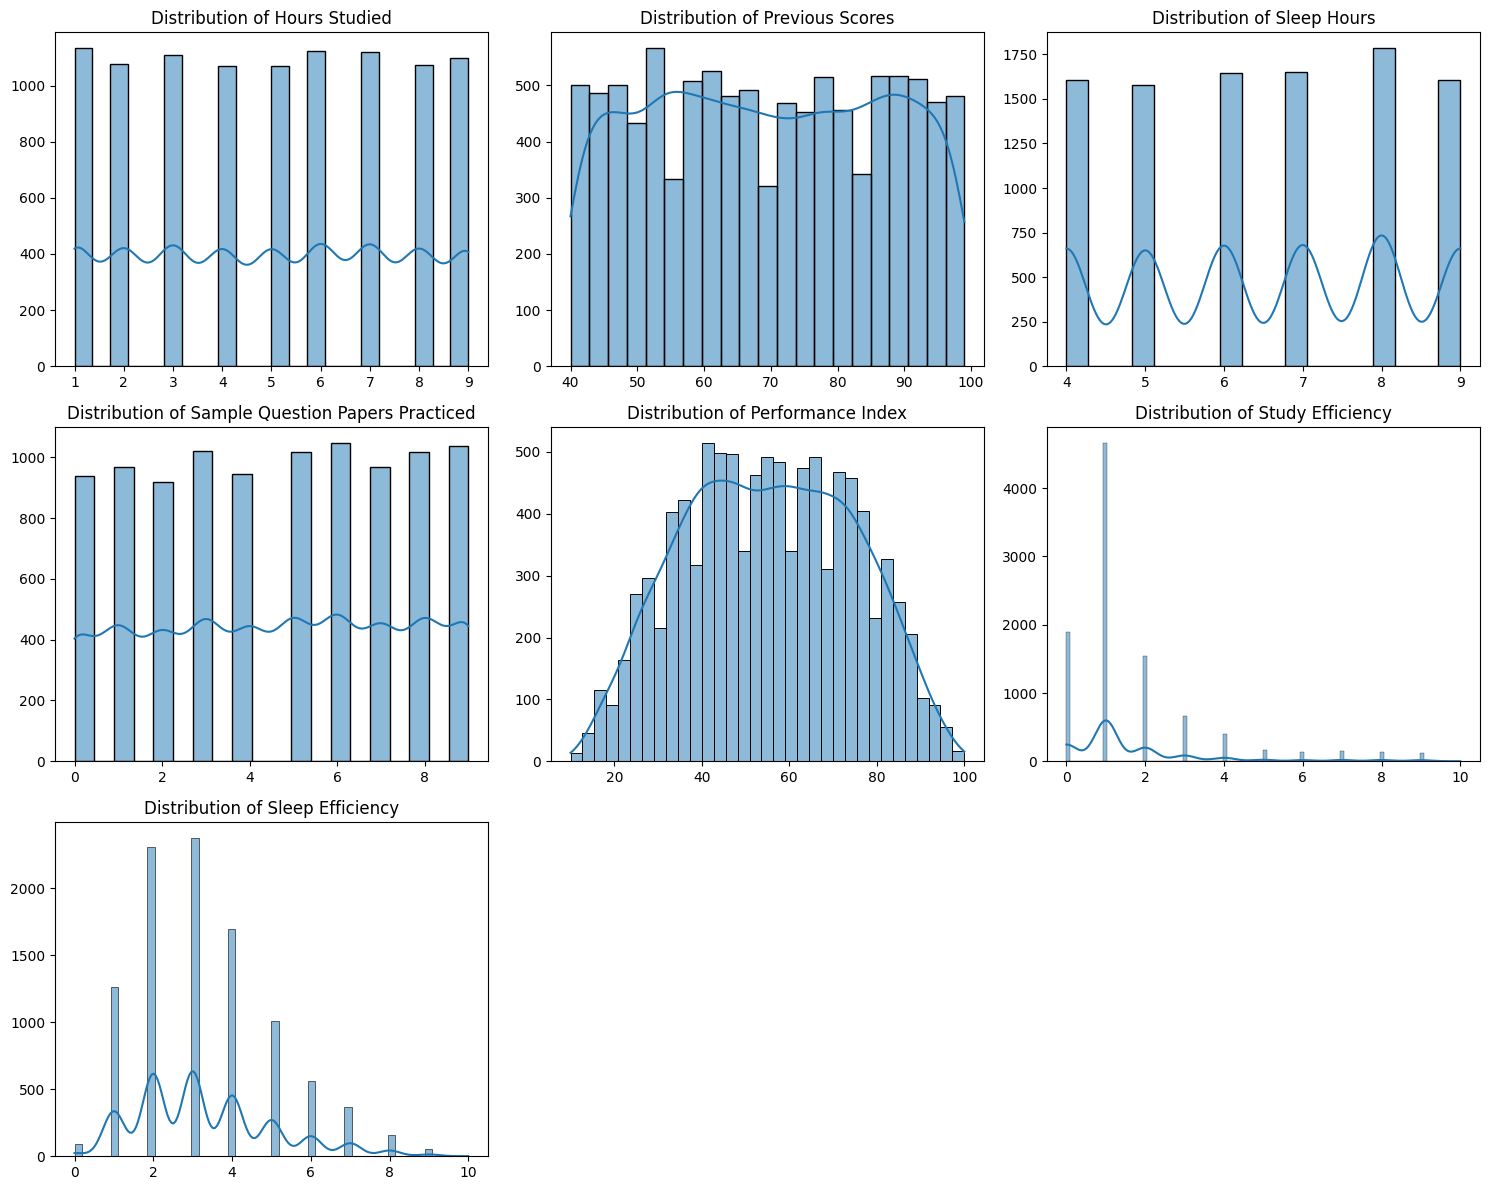

In [21]:
# List of numerical features to plot
numerical_features = [
    'Hours Studied', 'Previous Scores', 'Sleep Hours',
    'Sample Question Papers Practiced', 'Performance Index',
    'Study Efficiency', 'Sleep Efficiency'
]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()

# Plot the distribution for each numerical feature
for i, feature in enumerate(numerical_features):
    sns.histplot(df2[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Remove any empty subplots
for i in range(len(numerical_features), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()

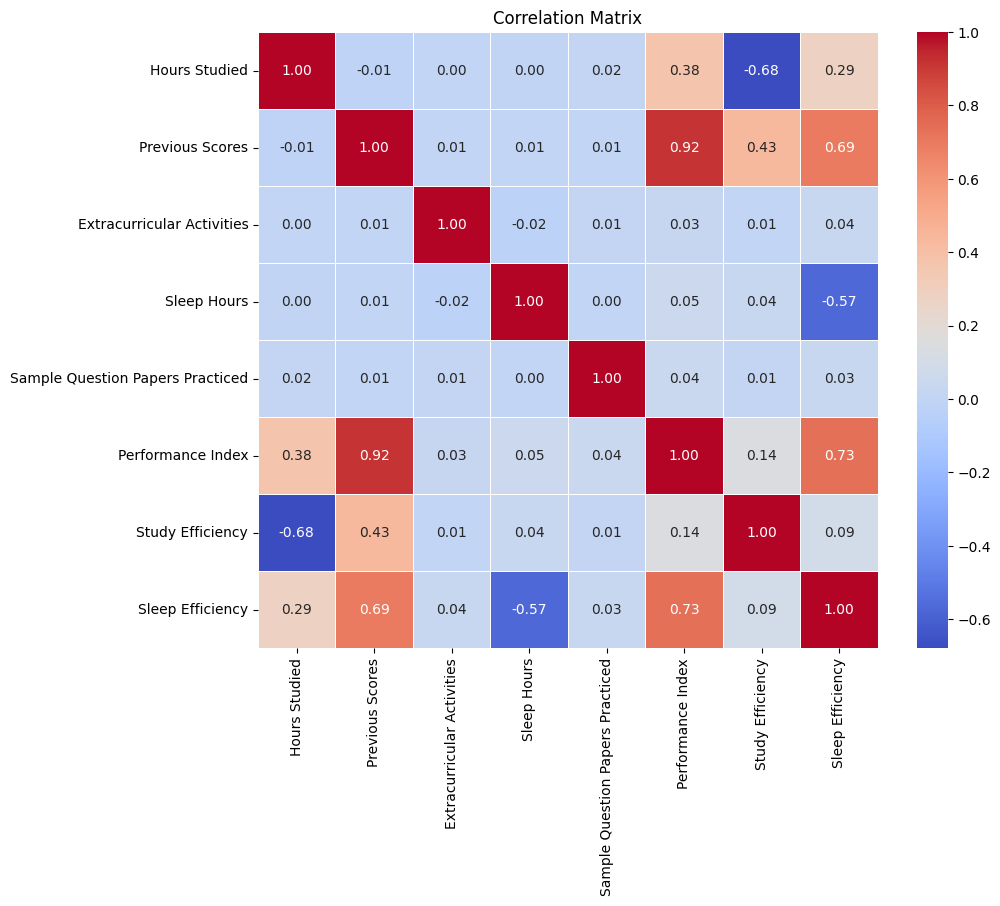

In [22]:
corr_matrix = df2.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# **Multiple Linear Regression**

MSE: 3.87
RMSE: 1.97
R^2: 0.99
MAPE: 3.33%


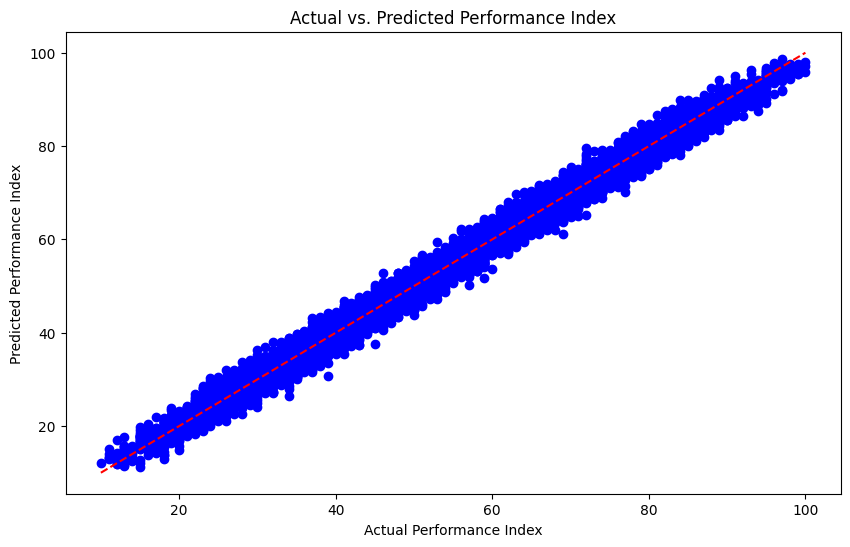

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Prepare the data
X = df2[['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours',
         'Sample Question Papers Practiced', 'Study Efficiency', 'Sleep Efficiency']]
y = df2['Performance Index']

# Initialize the Linear Regression model
model_lr = LinearRegression()

# Fit the model
model_lr.fit(X, y)

# Predict using the model
y_pred = model_lr.predict(X)

# Calculate metrics
mse_lr = mean_squared_error(y, y_pred)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y, y_pred)

# Calculate MAPE
mape_lr = np.mean(np.abs((y - y_pred) / y)) * 100

# Print metrics
print(f'MSE: {mse_lr:.2f}')
print(f'RMSE: {rmse_lr:.2f}')
print(f'R^2: {r2_lr:.2f}')
print(f'MAPE: {mape_lr:.2f}%')

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs. Predicted Performance Index')
plt.show()

# **Random Forest**

Random Forest Model Metrics:
MSE: 0.72
RMSE: 0.85
R^2: 1.00
MAPE: 1.35%


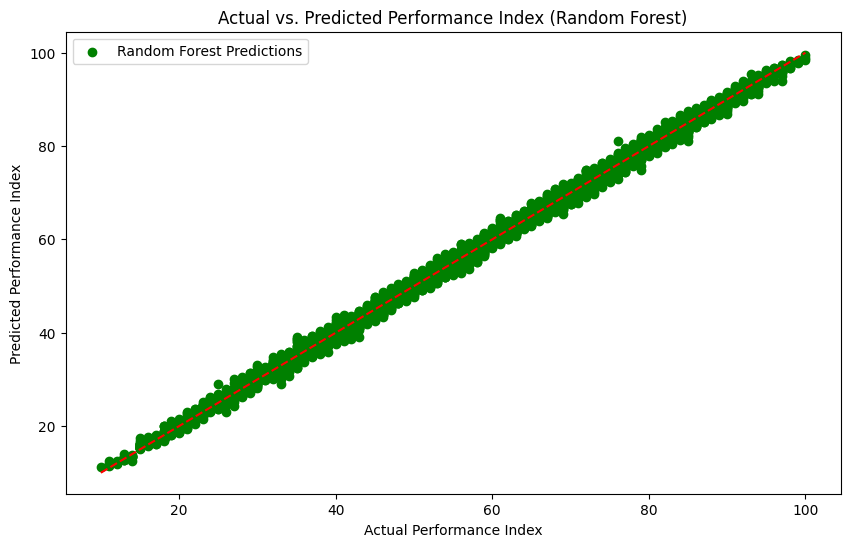

In [33]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model
model_rf.fit(X, y)

# Predict using the model
y_pred_rf = model_rf.predict(X)

# Calculate metrics
mse_rf = mean_squared_error(y, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y, y_pred_rf)

# Calculate MAPE
mape_rf = np.mean(np.abs((y - y_pred_rf) / y)) * 100

# Print metrics
print(f'Random Forest Model Metrics:')
print(f'MSE: {mse_rf:.2f}')
print(f'RMSE: {rmse_rf:.2f}')
print(f'R^2: {r2_rf:.2f}')
print(f'MAPE: {mape_rf:.2f}%')

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_rf, color='green', label='Random Forest Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs. Predicted Performance Index (Random Forest)')
plt.legend()
plt.show()


# **Support Vector Machine (SVM)**

Support Vector Machine (Linear Kernel) Model Metrics:
MSE: 3.87
RMSE: 1.97
R^2: 0.99
MAPE: 3.33%


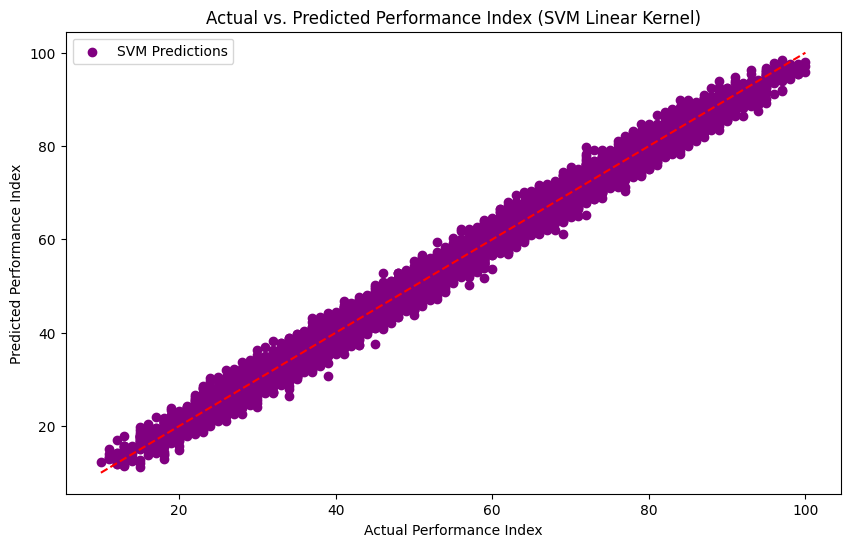

In [25]:
from sklearn.svm import SVR

# Initialize the Support Vector Regressor with a linear kernel
model_svm = SVR(kernel='linear')

# Fit the model
model_svm.fit(X, y)

# Predict using the model
y_pred_svm = model_svm.predict(X)

# Calculate metrics
mse_svm = mean_squared_error(y, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)
r2_svm = r2_score(y, y_pred_svm)

# Calculate MAPE
mape_svm = np.mean(np.abs((y - y_pred_svm) / y)) * 100

# Print metrics
print(f'Support Vector Machine (Linear Kernel) Model Metrics:')
print(f'MSE: {mse_svm:.2f}')
print(f'RMSE: {rmse_svm:.2f}')
print(f'R^2: {r2_svm:.2f}')
print(f'MAPE: {mape_svm:.2f}%')

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_svm, color='purple', label='SVM Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs. Predicted Performance Index (SVM Linear Kernel)')
plt.legend()
plt.show()

# **Decision Tree**

Decision Tree Regressor Model Metrics:
MSE: 0.18
RMSE: 0.43
R^2: 1.00
MAPE: 0.23%


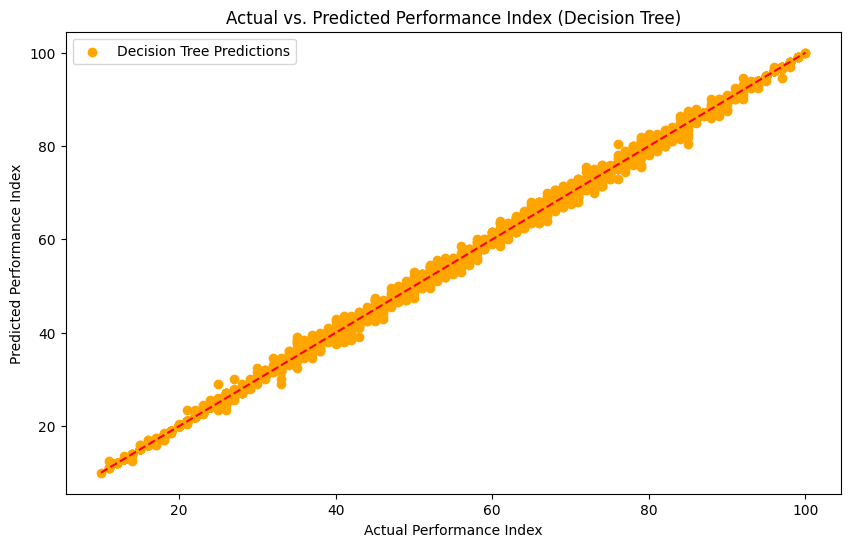

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor
model_dt = DecisionTreeRegressor(random_state=0)

# Fit the model
model_dt.fit(X, y)

# Predict using the model
y_pred_dt = model_dt.predict(X)

# Calculate metrics
mse_dt = mean_squared_error(y, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y, y_pred_dt)

# Calculate MAPE
mape_dt = np.mean(np.abs((y - y_pred_dt) / y)) * 100

# Print metrics
print(f'Decision Tree Regressor Model Metrics:')
print(f'MSE: {mse_dt:.2f}')
print(f'RMSE: {rmse_dt:.2f}')
print(f'R^2: {r2_dt:.2f}')
print(f'MAPE: {mape_dt:.2f}%')

# Plot Actual vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_dt, color='orange', label='Decision Tree Predictions')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel('Actual Performance Index')
plt.ylabel('Predicted Performance Index')
plt.title('Actual vs. Predicted Performance Index (Decision Tree)')
plt.legend()
plt.show()


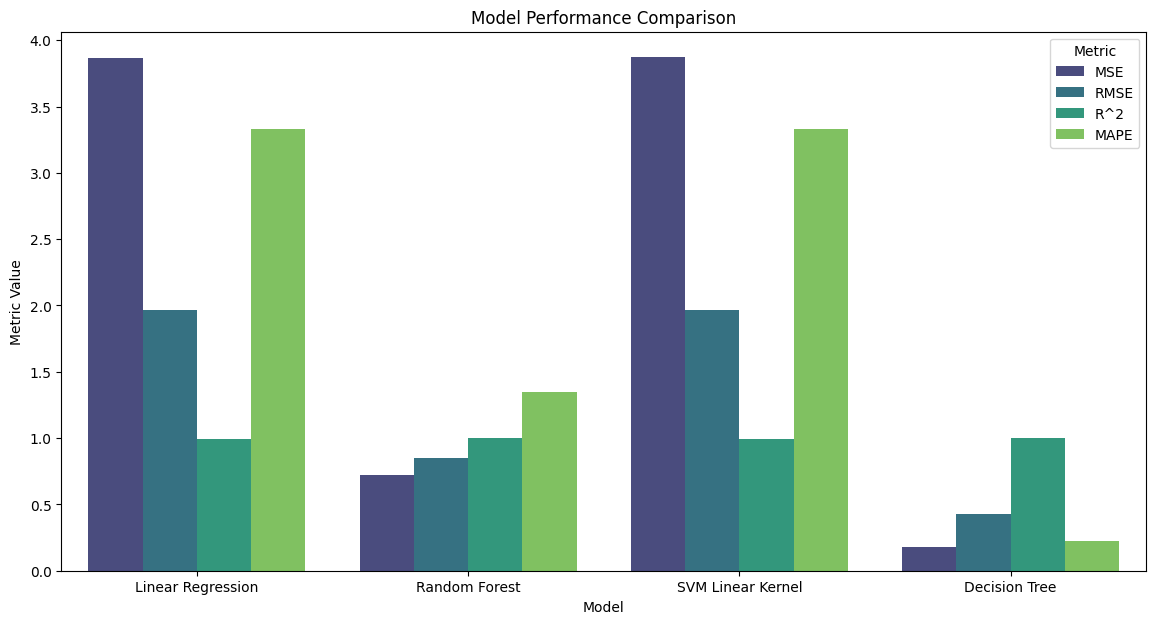

In [27]:
# Collecting metrics for each model
metrics = {
    'Model': ['Linear Regression', 'Random Forest', 'SVM Linear Kernel', 'Decision Tree'],
    'MSE': [mse_lr, mse_rf, mse_svm, mse_dt],
    'RMSE': [rmse_lr, rmse_rf, rmse_svm, rmse_dt],
    'R^2': [r2_lr, r2_rf, r2_svm, r2_dt],
    'MAPE': [mape_lr, mape_rf, mape_svm, mape_dt]
}

# Create a DataFrame from the metrics dictionary
metrics_df = pd.DataFrame(metrics)

# Melt the DataFrame to long format for seaborn
metrics_df_long = metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Plot using seaborn
plt.figure(figsize=(14, 7))
sns.barplot(data=metrics_df_long, x='Model', y='Value', hue='Metric', palette='viridis')
plt.title('Model Performance Comparison')
plt.ylabel('Metric Value')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.show()

# **K-fold cross validation**

Fold 1: R^2 = 0.99
Fold 2: R^2 = 0.99
Fold 3: R^2 = 0.99
Fold 4: R^2 = 0.99
Fold 5: R^2 = 0.99
Fold 6: R^2 = 0.99
Fold 7: R^2 = 0.99
Fold 8: R^2 = 0.99
Fold 9: R^2 = 0.99
Fold 10: R^2 = 0.99
Cross-Validated R^2: 0.99


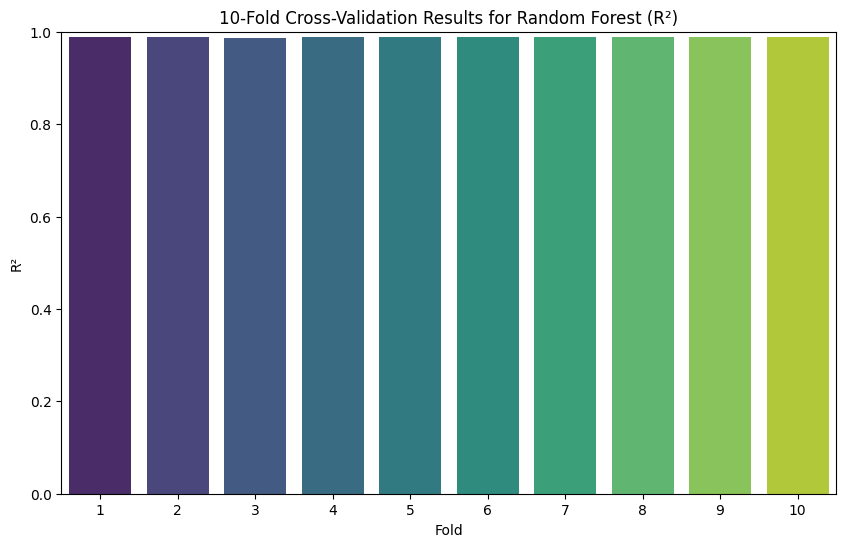

In [31]:
from sklearn.model_selection import cross_val_score

# Initialize the Random Forest Regressor
model_rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Perform 10-fold cross-validation with R² as the scoring metric
cv_scores_r2 = cross_val_score(model_rf, X, y, cv=10, scoring='r2')

# Print R² for each iteration
for i, score in enumerate(cv_scores_r2, start=1):
    print(f'Fold {i}: R^2 = {score:.2f}')

# Calculate and print cross-validated R²
mean_cv_score_r2 = np.mean(cv_scores_r2)
print(f'Cross-Validated R^2: {mean_cv_score_r2:.2f}')

# Create DataFrame for plotting
cv_results_df_r2 = pd.DataFrame({
    'Fold': np.arange(1, 11),
    'R^2': cv_scores_r2
})

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=cv_results_df_r2, x='Fold', y='R^2', palette='viridis')
plt.title('10-Fold Cross-Validation Results for Random Forest (R²)')
plt.xlabel('Fold')
plt.ylabel('R²')
plt.xticks(ticks=np.arange(10), labels=np.arange(1, 11))
plt.ylim(0, 1)  # R² ranges from 0 to 1
plt.show()

In [34]:
# Function to predict Performance Index and categorize the grade
def predict_performance_index(hours_studied, prev_scores, extra_activities, sleep_hours, sample_papers, study_efficiency, sleep_efficiency):
    # Convert yes/no to binary
    extra_activities = 1 if extra_activities.lower() == 'yes' else 0

    # Create a DataFrame for the input
    input_data = pd.DataFrame({
        'Hours Studied': [hours_studied],
        'Previous Scores': [prev_scores],
        'Extracurricular Activities': [extra_activities],
        'Sleep Hours': [sleep_hours],
        'Sample Question Papers Practiced': [sample_papers],
        'Study Efficiency': [study_efficiency],
        'Sleep Efficiency': [sleep_efficiency]
    })

    # Predict using the Random Forest model
    prediction = model_rf.predict(input_data)[0]

    # Determine grade
    if prediction > 90:
        grade = 'A+'
    elif prediction >= 81:
        grade = 'A'
    elif prediction >= 71:
        grade = 'B+'
    elif prediction >= 61:
        grade = 'B'
    elif prediction >= 51:
        grade = 'C+'
    elif prediction >= 41:
        grade = 'C'
    elif prediction >= 35:
        grade = 'D'
    else:
        grade = 'F'

    return prediction, grade

# Example usage (Replace these with real-time inputs in Colab)
hours_studied = float(input("How many Hours Do you study Before Exams? "))
prev_scores = float(input("What was your previous Test score (0-100)? "))
extra_activities = input("Do you participate in any extracurricular activities (yes/no)? ")
sleep_hours = float(input("How many Hours do you sleep? "))
sample_papers = int(input("Enter the total number of sample question papers that you have practiced: "))
study_efficiency = float(input("Enter your study efficiency (0-10): "))
sleep_efficiency = float(input("Enter your sleep Efficiency (0-10): "))

# Make prediction
predicted_performance_index, predicted_grade = predict_performance_index(
    hours_studied, prev_scores, extra_activities, sleep_hours,
    sample_papers, study_efficiency, sleep_efficiency
)

print(f'Your predicted Marks out of 100 for the next Exam are: {predicted_performance_index:.2f}')
print(f'Your Predicted Grade is : {predicted_grade}')

How many Hours Do you study Before Exams? 12
What was your previous Test score (0-100)? 87
Do you participate in any extracurricular activities (yes/no)? yes
How many Hours do you sleep? 8
Enter the total number of sample question papers that you have practiced: 10
Enter your study efficiency (0-10): 8
Enter your sleep Efficiency (0-10): 8
Your predicted Marks out of 100 for the next Exam are: 86.88
Your Predicted Grade is : A


In [35]:
import joblib
joblib.dump(model_rf, 'rf_student_marks_model.pkl')

['rf_student_marks_model.pkl']

In [36]:
import sklearn
print(sklearn.__version__)


1.3.2
